<a href="https://colab.research.google.com/github/elleniayele/Stroke-Prediction-Dataset.1/blob/main/Copy_of_stroke_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This data set is a Stroke Prediction Dataset. 
 
 The data is found on kaggle:
 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=



This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. let's start by importing libraries used to analyze the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
# Set global scikit-learn configuration 
from sklearn import set_config

1. Load and inspect the data

In [ ]:
# old_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbGUYkaeNb6udvgRyGgb3sWM3GJilaFZa_2Dnl-jv354fbdYYgqcxZIUKWUQBfW41cWng172zBMkmA/pub?output=csv'
new_url ="/content/archive (4).zip"
df = pd.read_csv(new_url)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


it has 11 clinical features for predicting stroke events. so it has 11 features and one target variable that is the column stroke . the rest of the columns are the features which are used to predict whether that individual will have a stroke or not.so it is a regression problem but also can be considered as a classification problem since the out put is either 0 or 1. to reassure we can use.unique() to find the unique values of the target.

In [ ]:
df['stroke'].unique()

array([1, 0])

In [ ]:
df.shape

(5110, 12)

It has 5110 rows and 12 columns.Each row in the data provides relavant information about the patient's heart_disease,whether he/she is ever_married,	work_type,	Residence_type,	avg_glucose_level,bmi, smoking_status, and whether that person has stroke or not. 

In [ ]:
#Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


2. Clean the Data

check for duplicated rows

In [ ]:
df.duplicated().sum()

0

there are no duplicated rows

check for the missing values

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi has missing values, so we need to clean it.

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df['bmi'].count()

4909

bmi column has 4908 non null values and  201 missing values. if we delete the columns, a lot of the data will be lost, so its better if we drop the missing values.

In [ ]:
df.dropna(inplace=True)

check for missing values

In [ ]:
df.isna().sum().sum()

0

there are no more missing values

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

drop unneccesary columns which are not related to the target

In [ ]:
df.drop(columns=['id'], inplace= True)

check for any outliers

In [ ]:
# Check for and address any impossible values in numeric columns.
df.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


everything seems to be in range

In [ ]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


In [ ]:
for col in df.columns:
 print( df[col].unique())
  

['Male' 'Female' 'Other']
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01]
[0 1]
[1 0]
['Yes' 'No']

gender can only have two values male or female but other is also an option, which we will remove now there can only be male or female values.

In [ ]:
for x in df.index:
  if df.loc[x, 'gender'] == 'Other':
    df.drop(x, inplace = True)

In [ ]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

now we only have two values male and female

in general since it has a missing values,it needs to be imputed  but it has both catagorical and numerical data so it needs to be one- hot encoded and scaled. that's the challenge.

# Explore the data

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


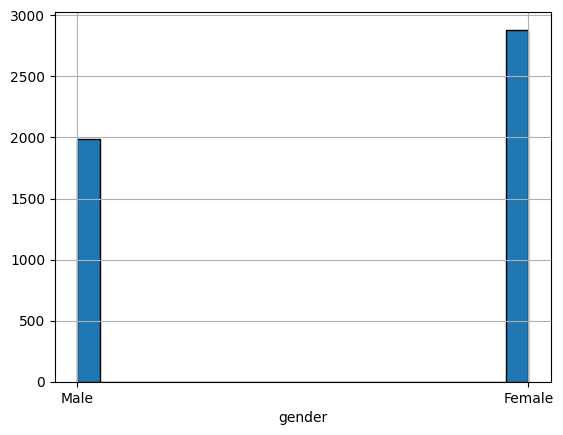

In [ ]:
ax = df['gender'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('gender');

there are more females than males

age should not be of float type, we should change it to integer type.

In [ ]:
df = df.astype({'age':'int'})
df['age'].unique()

array([67, 80, 49, 79, 81, 74, 69, 78, 61, 54, 50, 64, 75, 60, 71, 52, 82,
       65, 57, 42, 48, 72, 58, 76, 39, 77, 63, 73, 56, 45, 70, 59, 66, 43,
       68, 47, 53, 38, 55, 46, 32, 51, 14,  3,  8, 37, 40, 35, 20, 44, 25,
       27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 36,  0, 34,
       41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10,  1, 19,  6])

we can't have age is 0 so we will remove this value

In [ ]:
df.drop(df.loc[df['age']==0].index, inplace=True)

In [ ]:
df['age'].unique()

array([67, 80, 49, 79, 81, 74, 69, 78, 61, 54, 50, 64, 75, 60, 71, 52, 82,
       65, 57, 42, 48, 72, 58, 76, 39, 77, 63, 73, 56, 45, 70, 59, 66, 43,
       68, 47, 53, 38, 55, 46, 32, 51, 14,  3,  8, 37, 40, 35, 20, 44, 25,
       27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 36, 34, 41,
        5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10,  1, 19,  6])

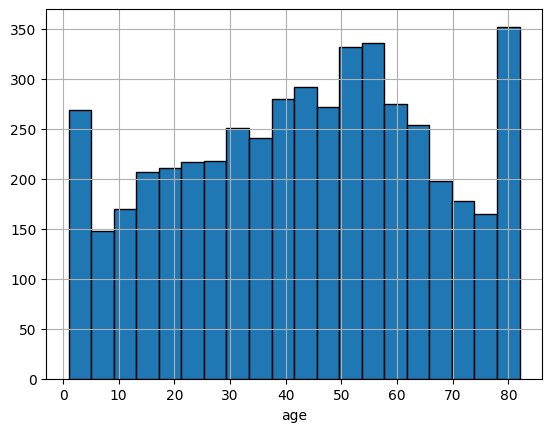

In [ ]:
ax = df['age'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('age');


from most datas age 80 has higher number

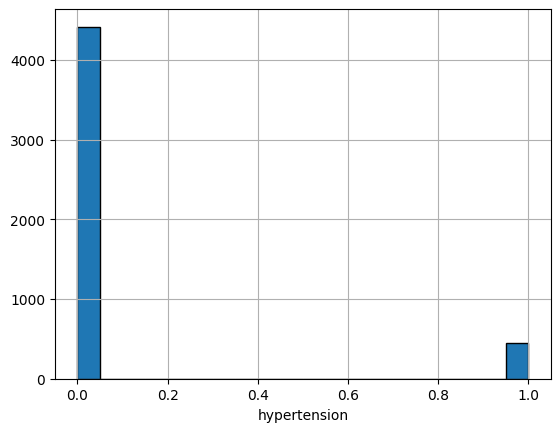

In [ ]:
ax = df['hypertension'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('hypertension');

most people have hypertension less than 0.2

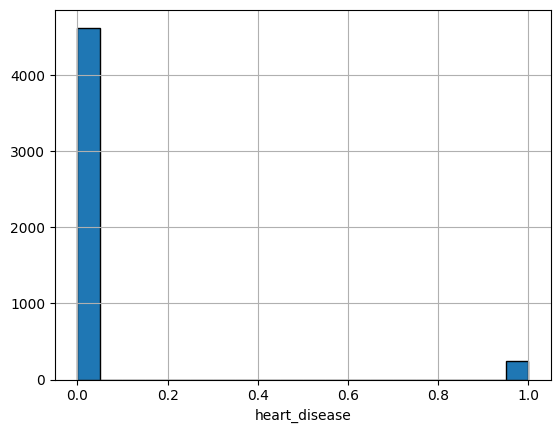

In [ ]:
ax = df['heart_disease'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('heart_disease');			

majority of the people don't have a heart disease

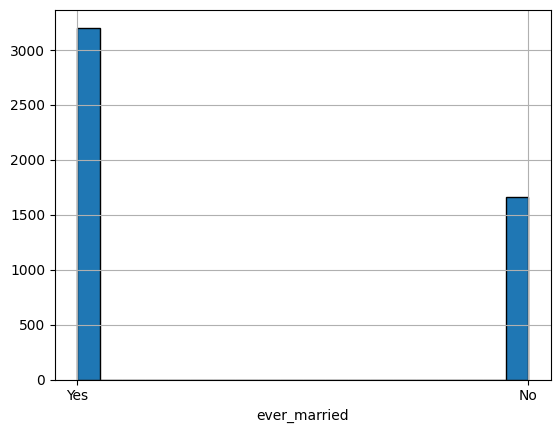

In [ ]:
ax = df['ever_married'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('ever_married');

most people in the data are married

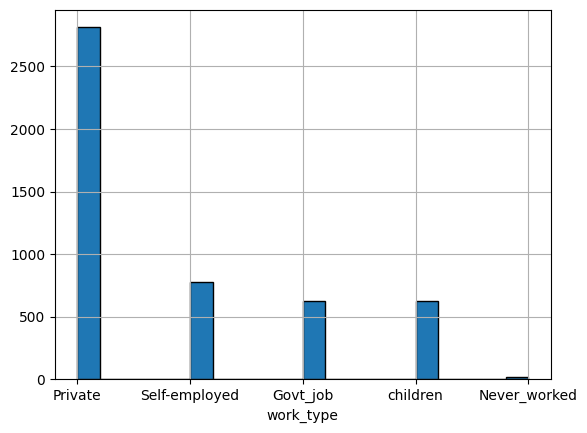

In [ ]:
ax = df['work_type'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('work_type');

most people working private has higher values than self employed, which self employed is slightly beeter than the people working government job and the least work type is children ofcourse which have no work so less value.

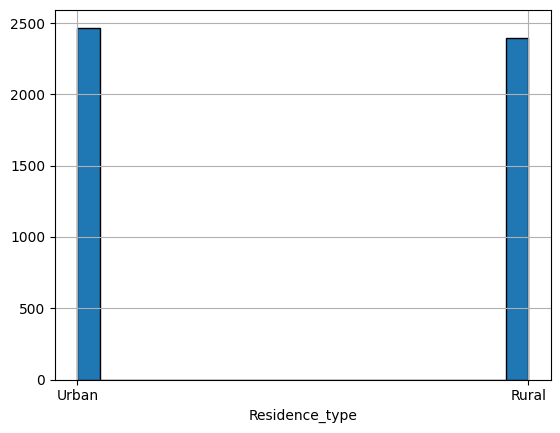

In [ ]:
ax = df['Residence_type'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('Residence_type');

almost similar but urban residence is a little bit higher than rural residence.

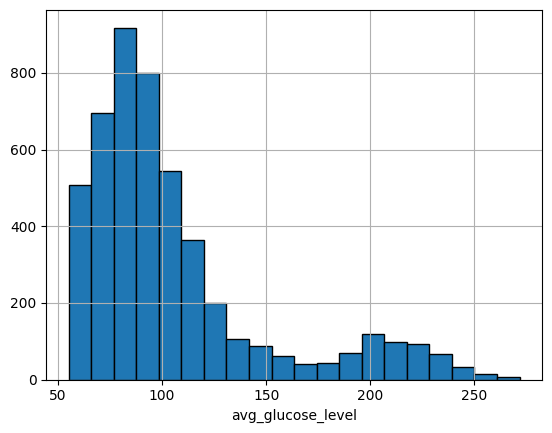

In [ ]:
ax = df['avg_glucose_level'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('avg_glucose_level');

most people have ave glucose level of around 75-80

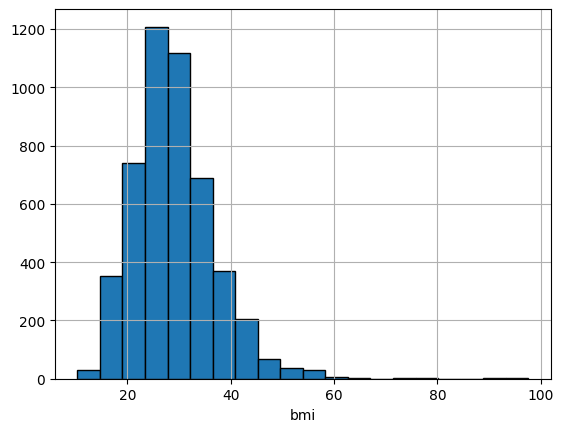

In [ ]:
ax = df['bmi'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('bmi');

most people have higher bmi of 25-30 value.

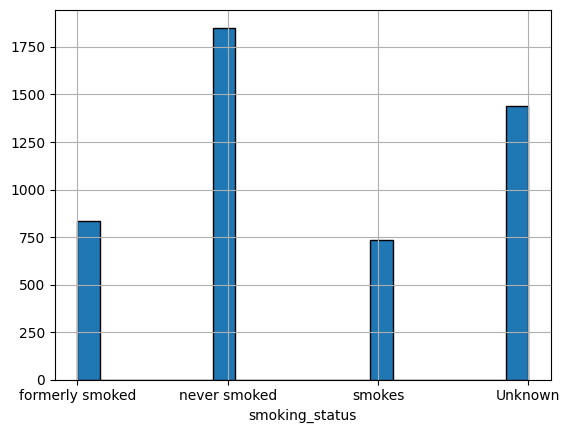

In [ ]:
ax = df['smoking_status'].hist(bins = 20,edgecolor='black')
ax.set_xlabel('smoking_status');

people who never smoked are higher than formerly smoked, and still smoking.

## 2nd choice is Adult income dataset

The data is found on kaggle:https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Load and inspect the data

In [ ]:
new_url ="/content/archive (5).zip"
df2 = pd.read_csv(new_url)
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The dataset contains 15 columns
and the target is  Income.
The income is divide into two classes: <=50K and >50K
We can explore the possibility in predicting income level based on the individual’s personal information. so it contain's a person's information to pridict income.

it is a regression data set since the out come is the income that is <=50K or  >50K.

In [ ]:
df2.shape

(48842, 15)

It has 48842 rows, and 15 columns.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df2.isna().sum().sum()

0

there are no missing values, so that is good.

it has no missing values the challenge i see is it has both numerical and catagorical data the data are not scaled the same so we need to process that, so we can explore and model it.

In [ ]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
for col in df2:
 print(col)
 print(df2[col].unique())

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[226802  89814 336951 ... 129912 255835 257302]
education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport

there is a question mark(?) in the column occupation, so we need to remove that

In [ ]:
df2.drop(df2.loc[df2['occupation']=='?'].index, inplace=True)


In [ ]:
df2[df2['occupation']=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


we fixed it

In native-country column, there are two strange values that are south, which doesn't exactly name the country, and it needs to be removed. The other one is
it says Hong which i think meant to say Hong kong, so we will replace Hong with Hong kong.

In [ ]:
df2.drop(df2.loc[df2['native-country']=='South'].index, inplace=True)

In [ ]:
df2.loc[df2['native-country']=='South']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [ ]:
df2['native-country'].replace({'Hong':'Hong Kong'}, inplace= True)
df2['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong Kong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

we see that there is a ? , in the country list, we need to fix that

In [ ]:
df2.drop(df2.loc[df2['native-country']=='?'].index, inplace=True)

In [ ]:
df2['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong Kong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

we fixed it! now let's visualize the data 

# Explore the data

In [ ]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


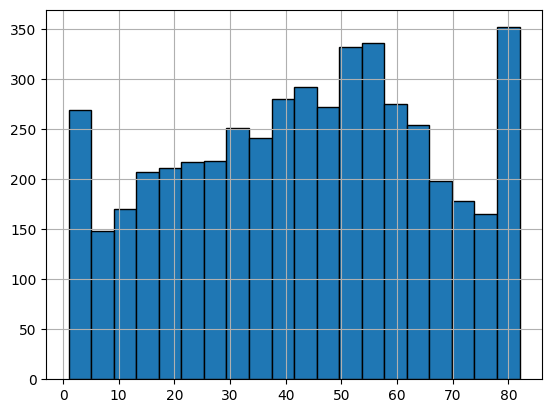

In [ ]:
ax = df['age'].hist(bins = 20,edgecolor='black')


higher age is 80

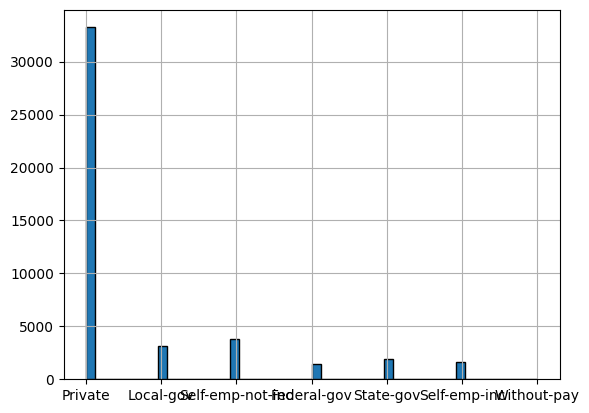

In [ ]:
ax = df2['workclass'].hist(bins = 50,edgecolor='black');


more people in the data work private

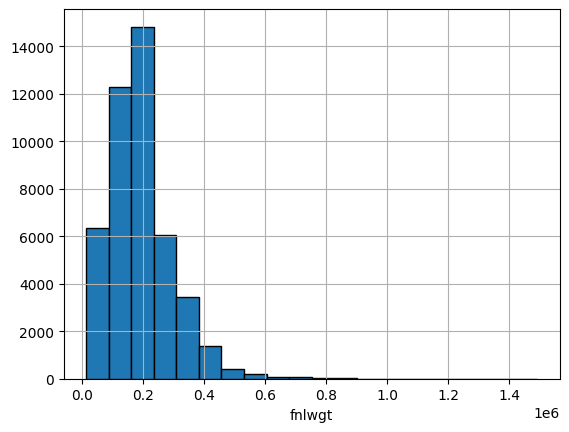

In [ ]:
ax = df2['fnlwgt'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('fnlwgt');

it has higher values of 0.2

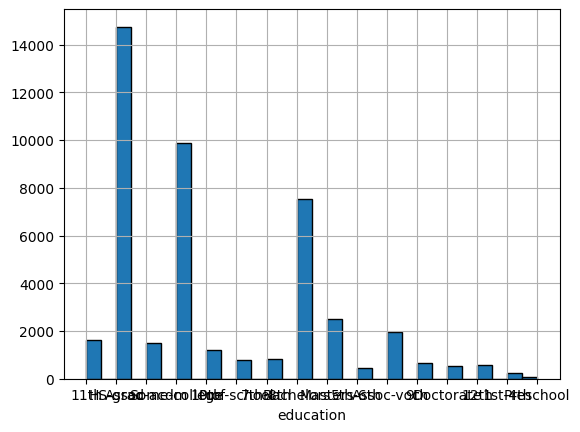

In [ ]:
ax = df2['education'].hist(bins =30,edgecolor='black');
ax.set_xlabel('education');

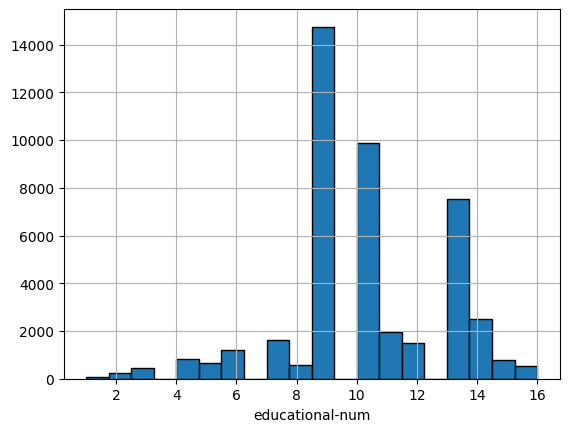

In [ ]:
ax = df2['educational-num'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('educational-num');

the data contains more 9th graders 

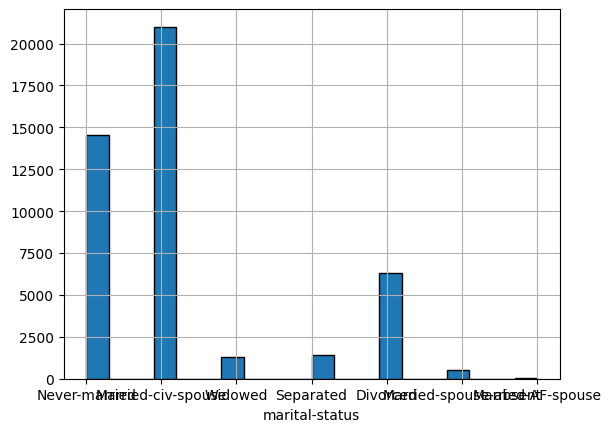

In [ ]:
ax = df2['marital-status'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('marital-status');

Married-civ-spouse has higher data

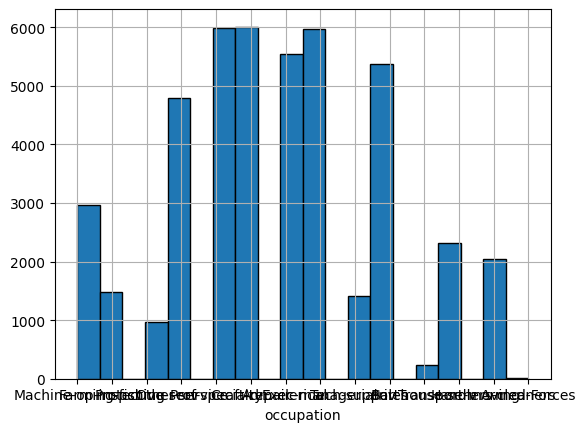

In [ ]:
ax = df2['occupation'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('occupation');

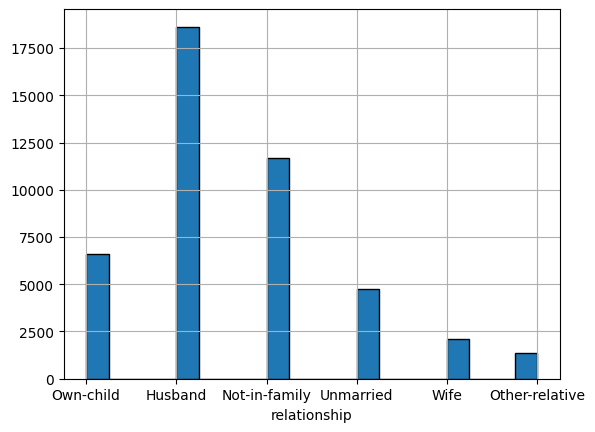

In [ ]:
ax = df2['relationship'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('relationship');

from the data collected, more than 17500 are husbands

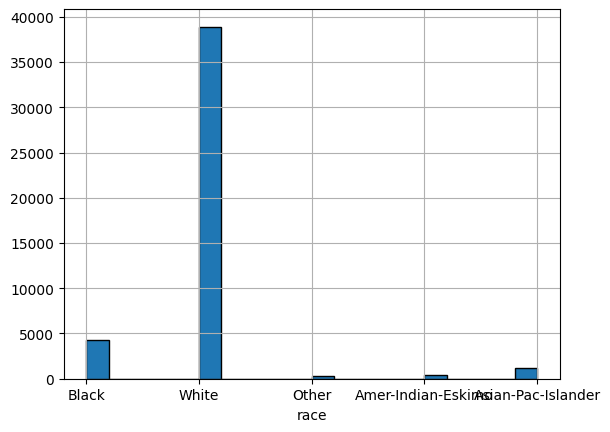

In [ ]:
ax = df2['race'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('race');

majority of the data collected are white race.

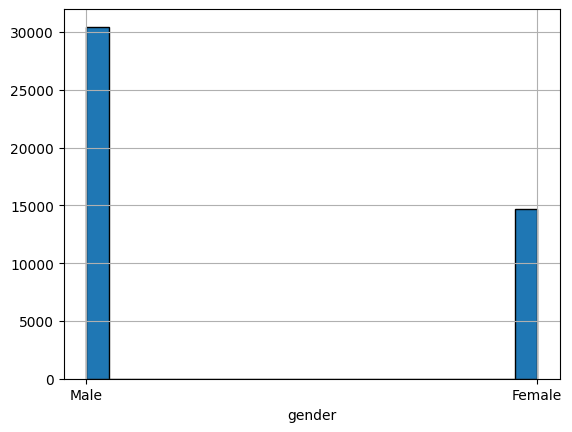

In [ ]:
ax = df2['gender'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('gender');

male have higher value than female

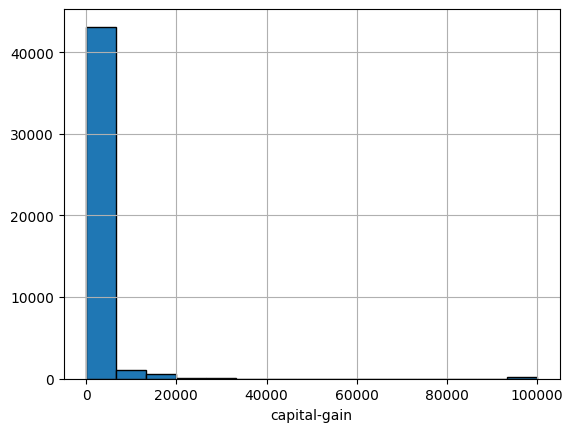

In [ ]:
ax = df2['capital-gain'].hist(bins = 15,edgecolor='black');
ax.set_xlabel('capital-gain');

capital gain is higher at around 5000 

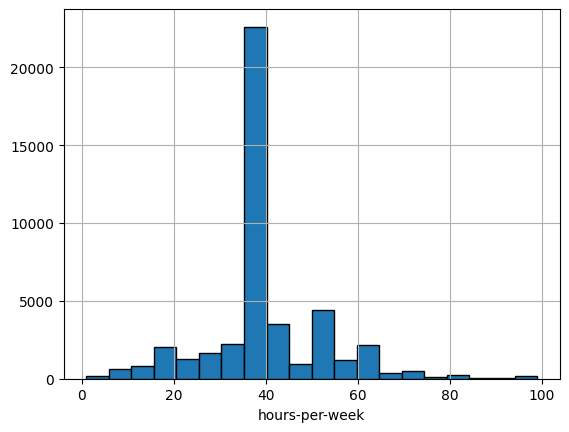

In [ ]:
ax = df2['hours-per-week'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('hours-per-week');

most hours worked are 35-40 hrs per week

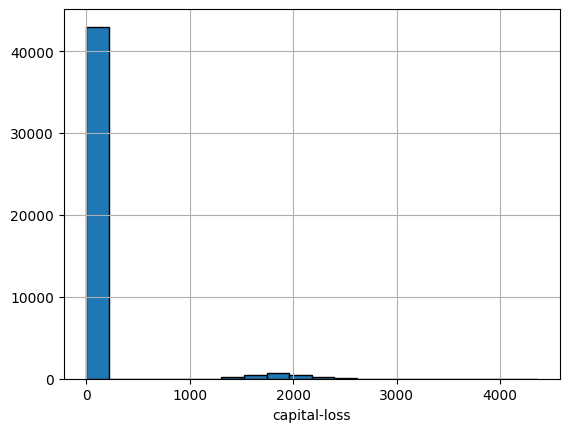

In [ ]:
ax = df2['capital-loss'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('capital-loss');

the highest capital-loss is  between 0-100 

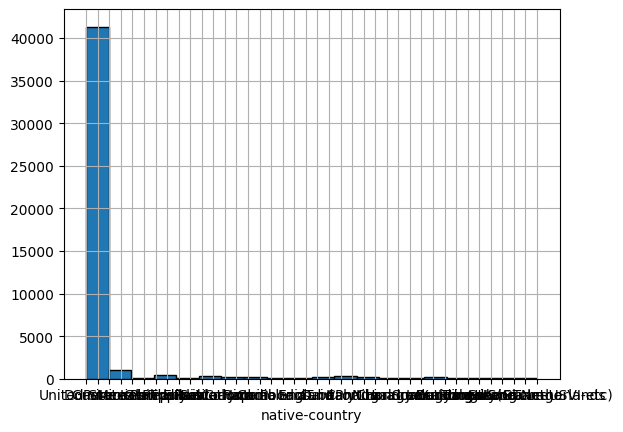

In [ ]:
ax = df2['native-country'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('native-country');

united states has the highest rate than other countries listed

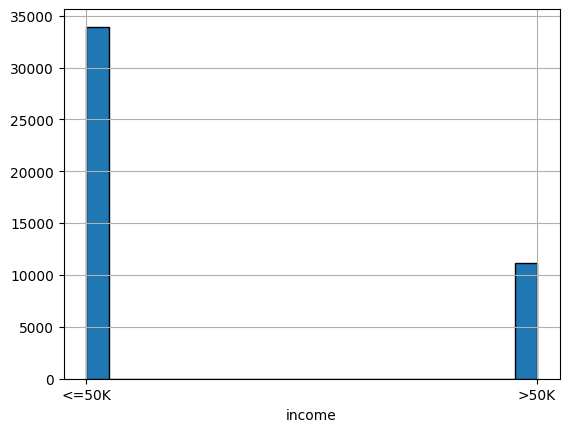

In [ ]:
ax = df2['income'].hist(bins = 20,edgecolor='black');
ax.set_xlabel('income');

most incomes are <=50k